$$\textbf {PREDICTION DE CONSOMMATION DE CARBURANT:}$$

$$\textbf {El MAGHRAOUI AYMANE}$$




$$Application$$

Dans ce projet, nous développons un modèle pour prédire la consommation de carburant des voitures, en la classant comme élevée ou faible. Le jeu de données utilisé, intitulé "Auto", comprend plusieurs caractéristiques des véhicules, dont la mesure clé est le "mpg" (miles per gallon), représentant l'efficacité énergétique en miles parcourus par gallon de carburant.

Pour simplifier l'analyse, une variable binaire, nommée mpg01, est créée. Elle attribue la valeur 1 aux observations où "mpg" dépasse sa médiane et 0 pour celles où "mpg" est en dessous. L'objectif principal est de construire un modèle de classification fiable, capable de prédire cette variable en se basant sur d'autres attributs du jeu de données.

Les étapes du projet incluent la manipulation des données, leur exploration, la création du modèle, et son évaluation à l'aide de techniques d'apprentissage supervisé.

Commençons par un pretraitement des données **:**

D'abord Importons nos données

In [31]:
import numpy as np
import pandas as pd


df = pd.read_csv("auto-mpg.csv")

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Visualisation des valeurs manquantes

Text(0.5, 1.0, 'Missing value in the dataset')

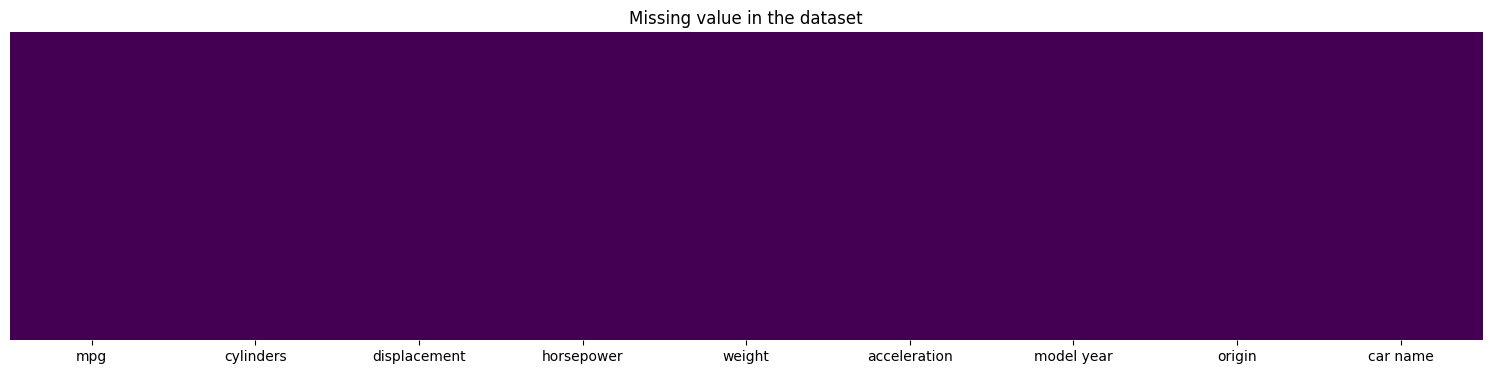

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(19,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset')

Affichons un graphe qui explique 'mpg' par 'displacement'

Text(0.5, 1.0, 'Hoursepower vs mpg')

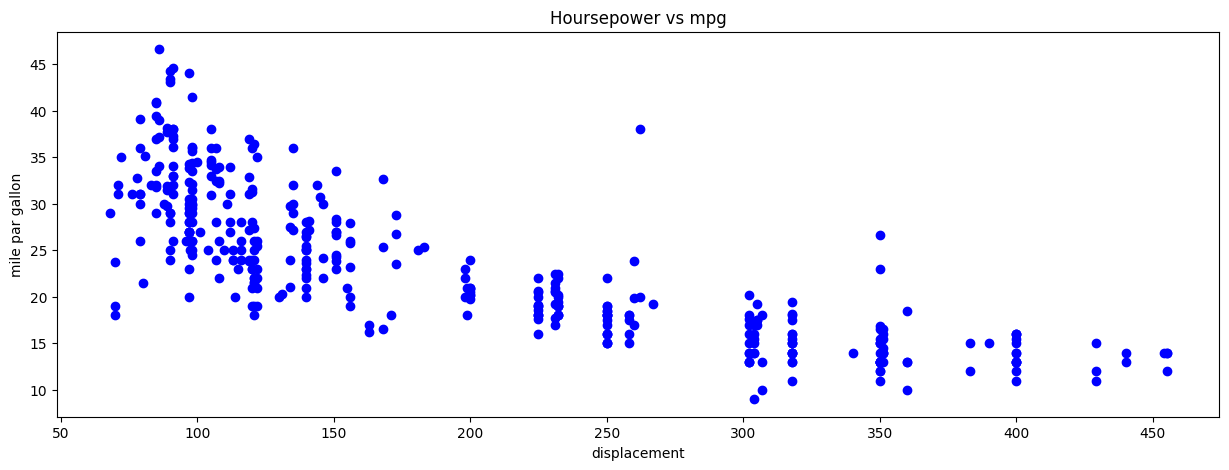

In [33]:
plt.figure(figsize=(15,5))
plt.scatter(x=df["displacement"],y=df["mpg"] , color="blue")
plt.xlabel("displacement")
plt.ylabel("mile par gallon")
plt.title("Hoursepower vs mpg")

Histogramme sur la colonne 'displacement' et sur log de la colonne 'mpg' (colonne cible)

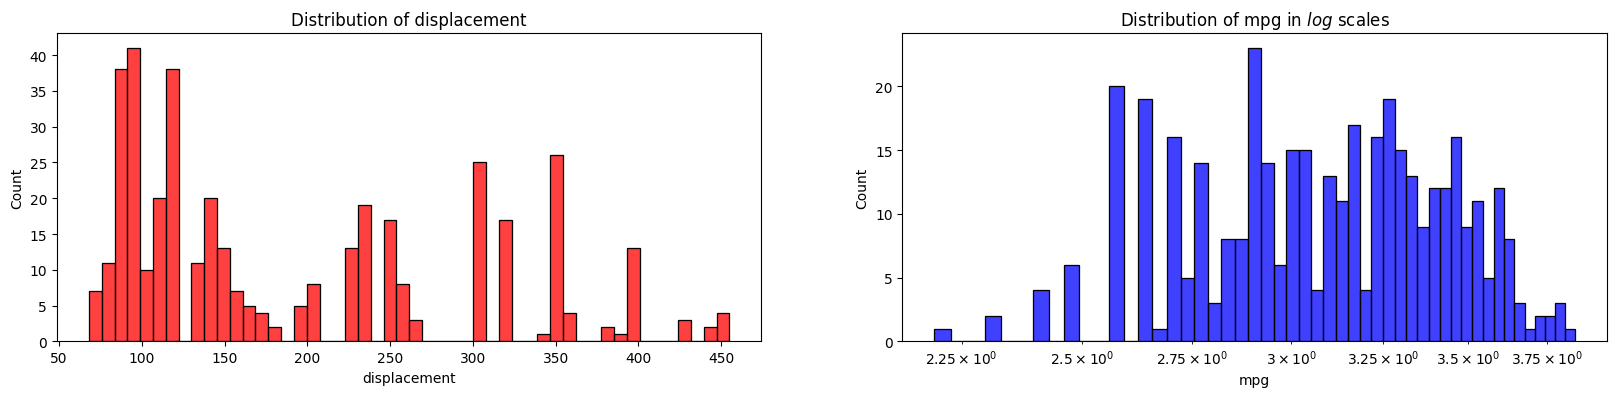

In [34]:
f = plt.figure(figsize=(20,4))

ax = f.add_subplot(121)
sns.histplot(df["displacement"],bins=50,color="r",ax=ax)
ax.set_title("Distribution of displacement")

ax = f.add_subplot(122)
sns.histplot(np.log(df["mpg"]),bins=50,color="b",ax=ax)
ax.set_title("Distribution of mpg in $log$ scales")
ax.set_xscale("log")

On remarque que nos distributions sont multimodales, avec des pics autour de 100-150 pour 'displacement' et 300-350 pour log'mpg'. La distribution du MPG, affichée en échelle logarithmique, met en évidence les variations sur toute la plage, avec un pic près de 
3
×
1
0
0
3×10 
0
 . Les graphiques sont clairs, mais ajouter un contexte sur l'utilisation de l'échelle logarithmique améliorerait leur interprétation.








In [35]:
df["horsepower_float"] = pd.to_numeric(df["horsepower"], errors='coerce')

ici nous avons créé une nouvelle variable basé sur la variable 'horsepower' (puissance) qui contient les valeur floats de 'horsepower', et cela juste pour la visualisation (et comprehension)

ploting

Text(0.5, 1.0, 'Scatter plot of Horse power vs mpg')

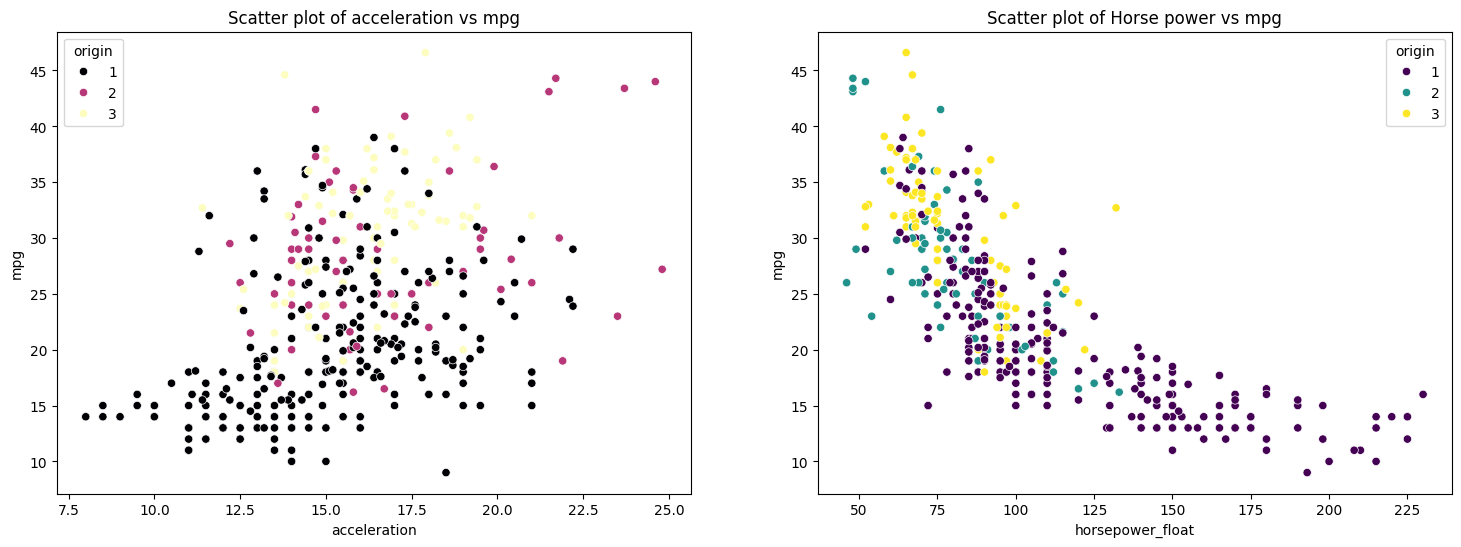

In [36]:
f = plt.figure(figsize=(18,6))

ax = f.add_subplot(121)
sns.scatterplot(x='acceleration',y='mpg',data=df,palette='magma',hue='origin',ax=ax)
ax.set_title('Scatter plot of acceleration vs mpg')

ax = f.add_subplot(122)
sns.scatterplot(x='horsepower_float',y='mpg',data=df,palette='viridis',hue='origin')
ax.set_title('Scatter plot of Horse power vs mpg')


1. Scatter plot : Acceleration vs MPG (à gauche)

On remarque une tendance positive : plus l'accélération augmente, plus le MPG (miles par gallon) a tendance à augmenter.
Les points sont répartis par origine (1, 2, 3), mais il n'y a pas de regroupement clair selon l'origine.

2. Scatter plot : Horsepower vs MPG (à droite)

Il y a une tendance négative : à mesure que la puissance (horsepower) augmente, le MPG diminue.
Les données montrent une séparation plus visible selon l'origine (1, 2, 3), surtout pour des valeurs plus basses ou moyennes de horsepower.

3. Observations générales

Les graphiques sont bien réalisés avec une légende claire pour l'origine.
Le deuxième graphique (Horsepower vs MPG) montre une relation plus marquée que le premier, ce qui indique que la puissance a une plus grande influence sur l'efficacité énergétique que l'accélération.

In [37]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 2 categorical variables

The categorical variables are : ['horsepower', 'car name']


In [38]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 8 numerical variables

The numerical variables are : ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'model year', 'origin', 'horsepower_float']


varleur manquante?

In [39]:
df[numerical].isnull().sum()

mpg                 0
cylinders           0
displacement        0
weight              0
acceleration        0
model year          0
origin              0
horsepower_float    6
dtype: int64

In [40]:
df[categorical].isnull().sum()

horsepower    0
car name      0
dtype: int64

On remarque qu'il n'y a pas de valeur manquante  

In [41]:
duplicates = df.duplicated()
print("Number of duplicates:", duplicates.sum())

Number of duplicates: 0


pas aussi de duplication

Plotons la correlation entre les variables

<Axes: >

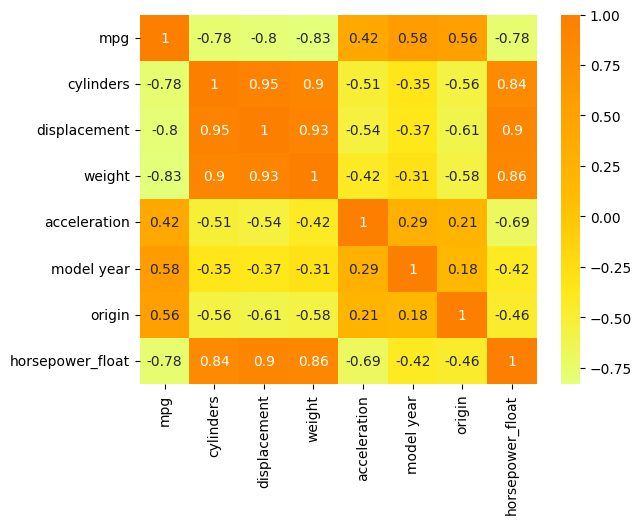

In [42]:
import seaborn as sns

corr = df.select_dtypes('number').corr()

sns.heatmap(corr, cmap = 'Wistia',annot=True)

En premier, on remarque que les varibles "cylinders","displacement","weight" ont une forte décorrélation avec la cible(mpg) ce qui signifie que ces variables explique une bonne information avec la cible.

On remarque aussi qu'**il y a une forte corrélation** entre les variables, notamment entre **"displacement"**, **"cylinders"** et **"weight"**.

Text(0, 0.5, 'mpg')

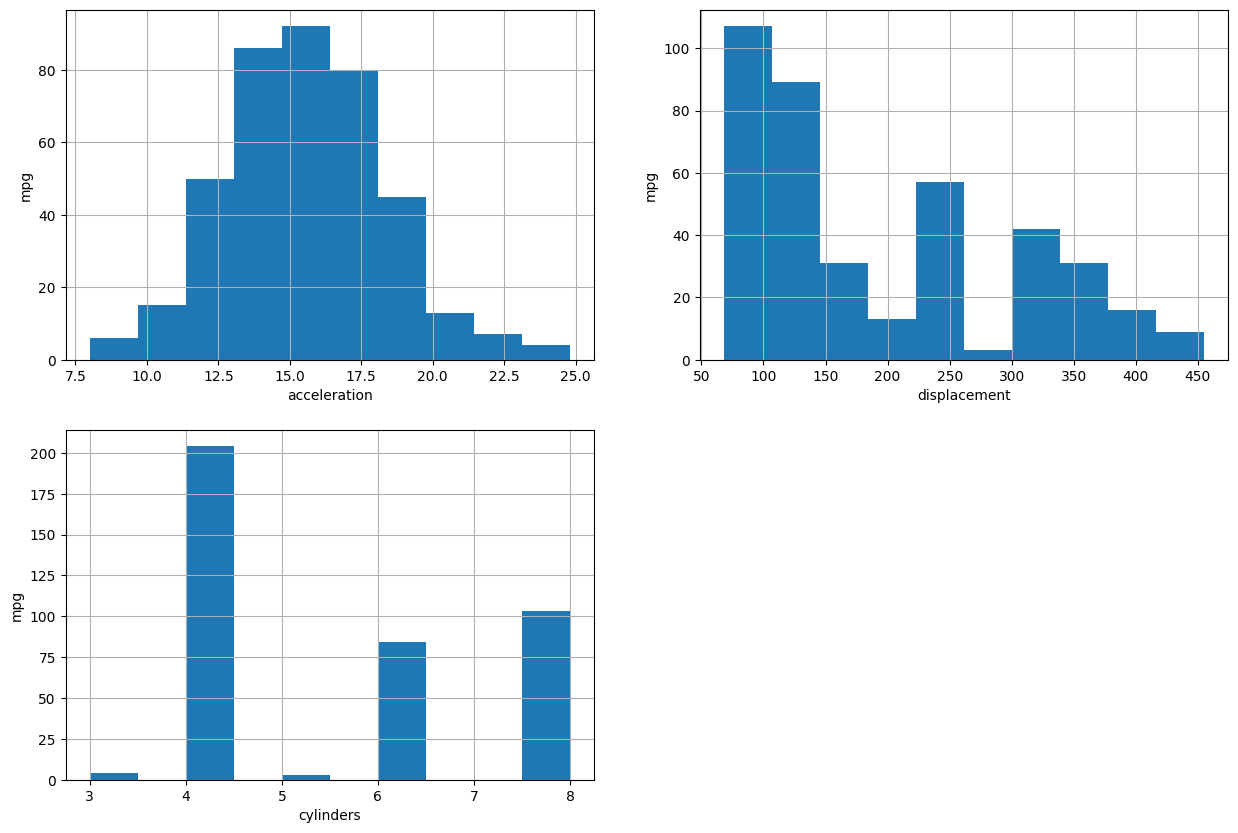

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.acceleration.hist(bins=10)
fig.set_xlabel('acceleration')
fig.set_ylabel('mpg')

plt.subplot(2, 2, 2)
fig = df.displacement.hist(bins=10)
fig.set_xlabel('displacement')
fig.set_ylabel('mpg')

plt.subplot(2, 2, 3)
fig = df.cylinders.hist(bins=10)
fig.set_xlabel('cylinders')
fig.set_ylabel('mpg')



On remarque une forte asymetrie sur la distribution des valeurs de la variable cylinders et displacement, ce qui signifie qu'elles contienent des valeurs aberrantes

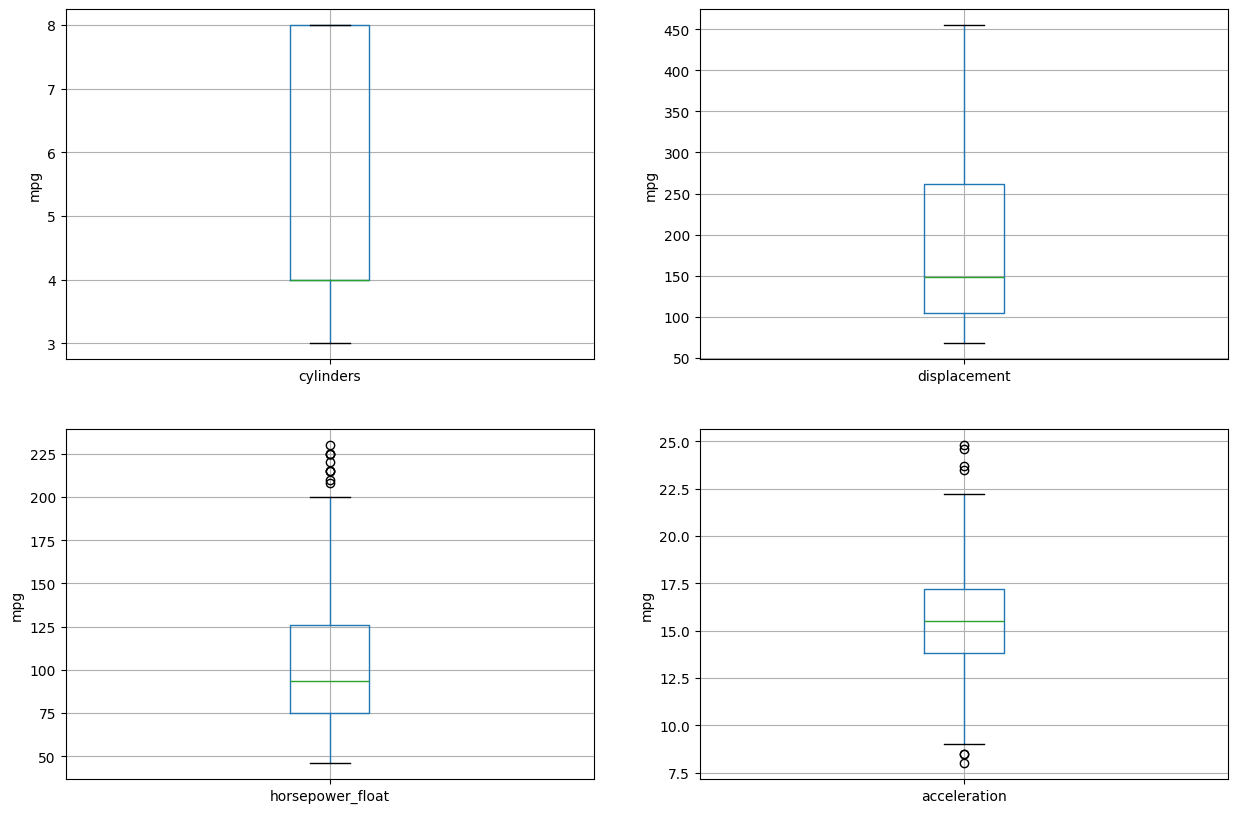

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column="cylinders")
fig.set_ylabel('mpg')

plt.subplot(2, 2, 2)
fig = df.boxplot(column="displacement")
fig.set_ylabel('mpg')

plt.subplot(2, 2, 3)
fig = df.boxplot(column="horsepower_float")
fig.set_ylabel('mpg')

plt.subplot(2, 2, 4)
fig = df.boxplot(column="acceleration")
fig.set_ylabel('mpg')

plt.show()



In [45]:
df.drop("horsepower_float", inplace=True, axis=1)


maintenant, on supprime la colonne "horsepower_float"

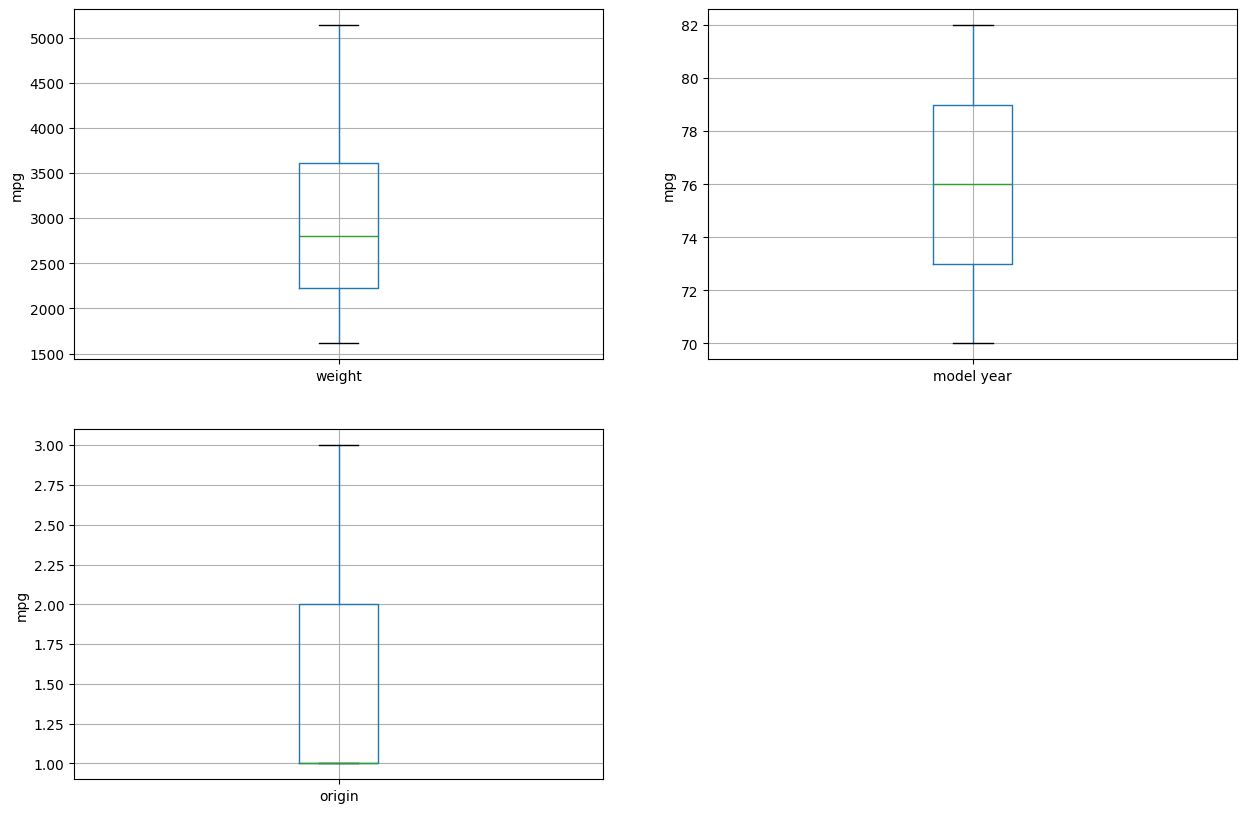

In [46]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.boxplot(column="weight")
fig.set_ylabel('mpg')

plt.subplot(2, 2, 2)
fig = df.boxplot(column="model year")
fig.set_ylabel('mpg')


plt.subplot(2, 2, 3)
fig = df.boxplot(column="origin")
fig.set_ylabel('mpg')
plt.show()


In [47]:
numerical = [var for var in df.columns if df[var].dtype!='O']

Effectuons une gestion des valeurs aberrantes

In [48]:
def check_and_handle_outliers(df, numerical):

    print("Détecter les valeurs aberrantes...")
    outliers_present = False
    
    for col in numerical:

        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        
        if len(outliers) > 0:
            outliers_present = True
            print(f"\n Column: {col}")
            print(f"Nombre des valeurs aberrantes: {len(outliers)}")
            print(f"Bounds: ({lower_bound:.2f}, {upper_bound:.2f})")
            
            df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    
    if not outliers_present:
        print("Aucune valeur aberrante n'a été trouver!")
    
    return df

df = check_and_handle_outliers(df, numerical)

print("\n Verification après le traitement...")
check_and_handle_outliers(df, numerical)

Détecter les valeurs aberrantes...

 Column: mpg
Nombre des valeurs aberrantes: 1
Bounds: (0.25, 46.25)

 Column: acceleration
Nombre des valeurs aberrantes: 7
Bounds: (8.80, 22.20)

 Verification après le traitement...
Détecter les valeurs aberrantes...
Aucune valeur aberrante n'a été trouver!


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,22.2,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [49]:
categorical

['horsepower', 'car name']

**Q_a:**

Créeons une variable binaire, "mpg01", qui contient un 1 si "mpg" contient une valeur supérieure à sa médiane, et un 0 si "mpg" contient une valeur inférieure à sa médiane

En même temps supprimons la colonne "car name" et convertissons les valeurs de "horsepower" en labels numériques avec LabelEncoder.

In [50]:
from sklearn.preprocessing import LabelEncoder

df.drop("car name", inplace=True, axis=1)

le = LabelEncoder()

df["horsepower"] = le.fit_transform(df["horsepower"])

# Transformons la colonne 'mpg' en binaire (0 et 1) suivant la mediane.
for i in range(len(df["mpg"])):
    if df["mpg"].iloc[i] >= df["mpg"].median() :
        df.loc[i,"mpg"] = 1
    else :
        df.loc[i,"mpg"] = 0

df.rename(columns={'mpg': 'mpg01'}, inplace=True)

df


,mpg01,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,0.0,8,307.0,15,3504,12.0,70,1
1,0.0,8,350.0,33,3693,11.5,70,1
2,0.0,8,318.0,27,3436,11.0,70,1
3,0.0,8,304.0,27,3433,12.0,70,1
4,0.0,8,302.0,22,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,1.0,4,140.0,80,2790,15.6,82,1
394,1.0,4,97.0,51,2130,22.2,82,2
395,1.0,4,135.0,78,2295,11.6,82,1
396,1.0,4,120.0,73,2625,18.6,82,1


In [51]:
df.columns

Index(['mpg01', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

**Q_b:**

Explorons les données graphiquement afin d'investiguer l'association entre mpg01 et les autres caractéristiques.

Pour cela générons des nuages de points (scatterplots) pour visualiser la relation entre chaque colonne du DataFrame df (sauf la première) et la colonne cible mpg01.

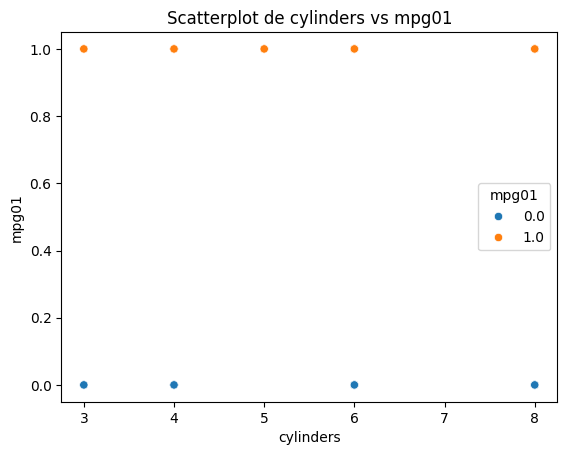

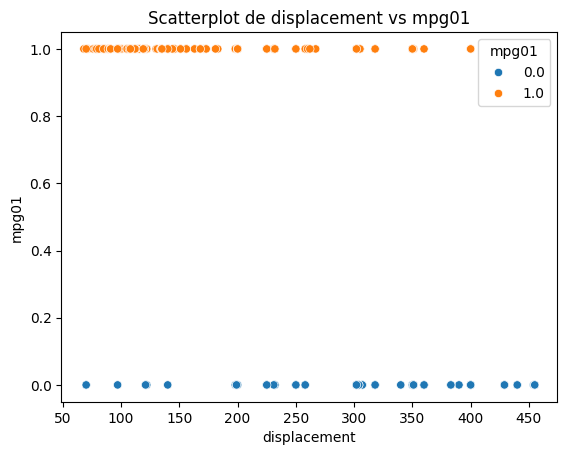

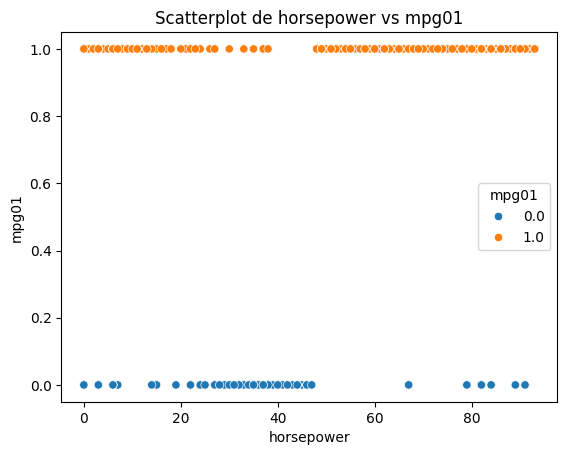

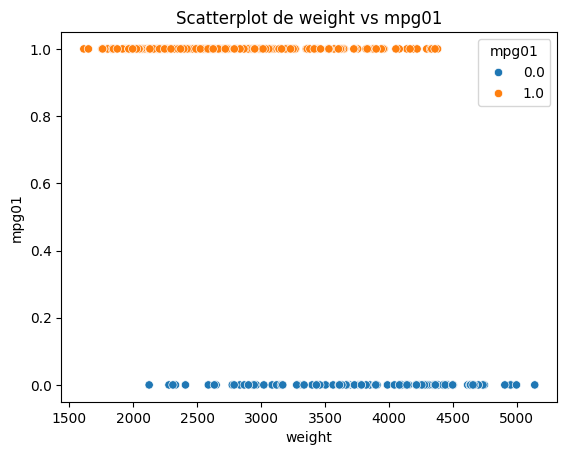

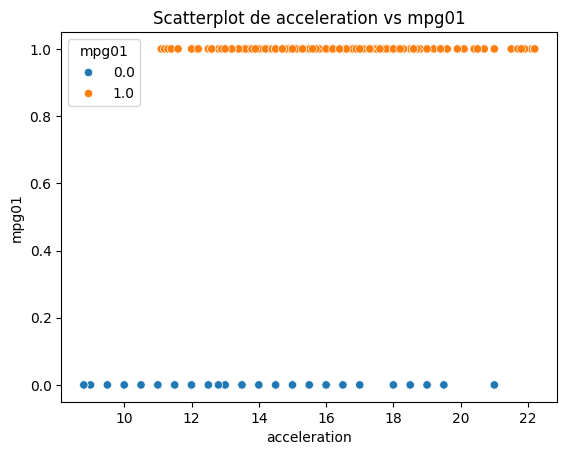

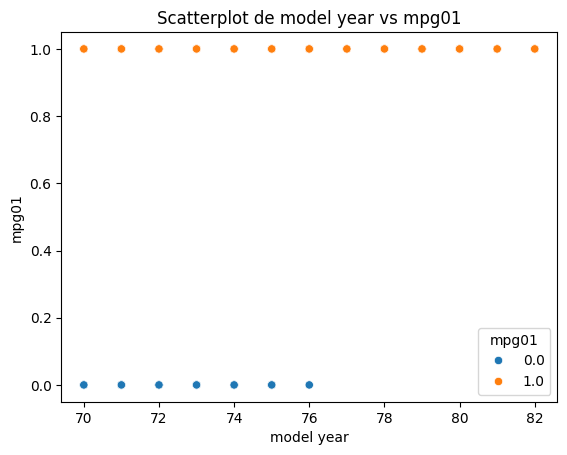

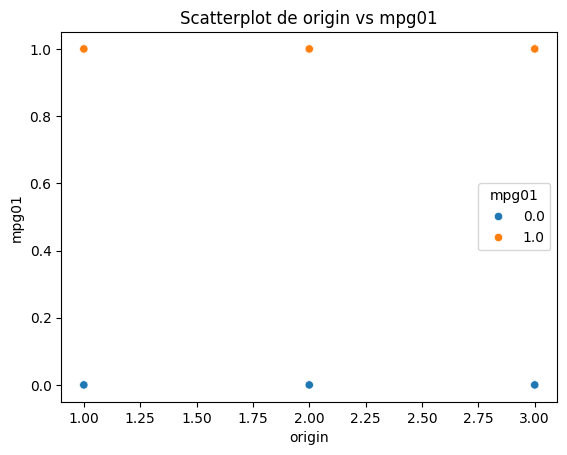

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df.columns[1:]: 
    sns.scatterplot(data=df, x=col, y='mpg01', hue='mpg01')
    plt.title(f"Scatterplot de {col} vs mpg01")
    plt.show()

**On remarque ainsi** que **les carctéristiques** qui semblent les plus susceptibles d'être **utile** pour prédire **mpg01** sont : **'displacement'**, **'horsepower'**, **'weight'**, **'acceleration'**, **'model year'** et **'cylinders'**

---

Créeons le dataframe X qui contient uniquement les caractéristiques qui semblent les plus susceptibles d'être utile pour prédire mpg01

In [53]:
X = df.drop(columns=["mpg01","origin"], axis=1)
y = df["mpg01"]
X

,cylinders,displacement,horsepower,weight,acceleration,model year
0,8,307.0,15,3504,12.0,70
1,8,350.0,33,3693,11.5,70
2,8,318.0,27,3436,11.0,70
3,8,304.0,27,3433,12.0,70
4,8,302.0,22,3449,10.5,70
...,...,...,...,...,...,...
393,4,140.0,80,2790,15.6,82
394,4,97.0,51,2130,22.2,82
395,4,135.0,78,2295,11.6,82
396,4,120.0,73,2625,18.6,82


Normalisons les valeurs des colonnes du dataframe X en les transformant dans une plage de [0, 1] à l'aide de MinMaxScaler de scikit-learn,
puis remplaçons les colonnes normalisées dans le dataframe X pour une échelle cohérente entre les différentes caractéristiques.

In [54]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

columns = X.columns
X[columns] = scaler.fit_transform(X[columns])
X[columns]

,cylinders,displacement,horsepower,weight,acceleration,model year
0,1.0,0.617571,0.161290,0.536150,0.238806,0.0
1,1.0,0.728682,0.354839,0.589736,0.201493,0.0
2,1.0,0.645995,0.290323,0.516870,0.164179,0.0
3,1.0,0.609819,0.290323,0.516019,0.238806,0.0
4,1.0,0.604651,0.236559,0.520556,0.126866,0.0
...,...,...,...,...,...,...
393,0.2,0.186047,0.860215,0.333711,0.507463,1.0
394,0.2,0.074935,0.548387,0.146583,1.000000,1.0
395,0.2,0.173127,0.838710,0.193365,0.208955,1.0
396,0.2,0.134367,0.784946,0.286929,0.731343,1.0


Vérifions l'état du DataFrame après le traitement des valeurs aberrantes en réutilisant la même fonction.

In [55]:
columns = X.columns
X = check_and_handle_outliers(X, columns)

print("\n Verfication après le traitement...")
check_and_handle_outliers(X, columns)

Détecter les valeurs aberrantes...
Aucune valeur aberrante n'a été trouver!

 Verfication après le traitement...
Détecter les valeurs aberrantes...
Aucune valeur aberrante n'a été trouver!


,cylinders,displacement,horsepower,weight,acceleration,model year
0,1.0,0.617571,0.161290,0.536150,0.238806,0.0
1,1.0,0.728682,0.354839,0.589736,0.201493,0.0
2,1.0,0.645995,0.290323,0.516870,0.164179,0.0
3,1.0,0.609819,0.290323,0.516019,0.238806,0.0
4,1.0,0.604651,0.236559,0.520556,0.126866,0.0
...,...,...,...,...,...,...
393,0.2,0.186047,0.860215,0.333711,0.507463,1.0
394,0.2,0.074935,0.548387,0.146583,1.000000,1.0
395,0.2,0.173127,0.838710,0.193365,0.208955,1.0
396,0.2,0.134367,0.784946,0.286929,0.731343,1.0


**Q_c:**

Divisez les données en ensembles d'entraînement et de test.

Pour cela on utilisera une taille de 25 % du dataframe pour les données de test et 75% pour les données d'entrainement, fixer random_state=42 pour garantir la reproductibilité des partitions.
Nous reserverons aussi une partie pour la validation.

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X , y, random_state=42,test_size=0.25 )

---

**Q_d:**

Effectuons une analyse discriminante linéaire (LDA) sur les données d'entraînement afin de prédire mpg01 en utilisant les variables qui semblent les plus associées à mpg01 dans (b). Et determinons l'erreur de test du modèle obtenu.

On utilisera (1 - précision) à l'aide de accuracy_score pour le calcul d'erreur.

In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import f1_score, recall_score, precision_score,accuracy_score


lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)

print(f'{lda.score(X_test, y_test)*100}%')
test_error = 1 - accuracy_score(y_test, y_pred)
print("nombre des features",lda.n_features_in_)
print(f"Test Error: {test_error}")
print("Precision:", precision_score(y_test, y_pred, average='binary'))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred, average='binary'))
print("F1-score:", f1_score(y_test, y_pred, average='binary'))

95.0%
nombre des features 6
Test Error: 0.050000000000000044
Precision: 0.972972972972973
Accuracy: 0.95
Recall: 0.96
F1-score: 0.9664429530201343


In [67]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)

print(f'{lda.score(X_test, y_test)*100}%')
test_error = 1 - accuracy_score(y_test, y_pred)
print(f"Test Error: {test_error}")
print(lda.n_features_in_)
print("Precision:", precision_score(y_test, y_pred, average='binary'))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred, average='binary'))
print("F1-score:", f1_score(y_test, y_pred, average='binary'))

ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

Verifions si il y'a surapprentissage

In [102]:
y_pred = lda.predict(X_train)

print(f'{lda.score(X_train, y_train)*100}%')
test_error = 1 - accuracy_score(y_train, y_pred)
print(f"Test Error: {test_error}")
print("Precision:", precision_score(y_train, y_pred, average='binary'))
print("Accuracy:", accuracy_score(y_train, y_pred))
print("Recall:", recall_score(y_train, y_pred, average='binary'))
print("F1-score:", f1_score(y_train, y_pred, average='binary'))

94.96644295302013%
Test Error: 0.05033557046979864
Precision: 0.9592760180995475
Accuracy: 0.9496644295302014
Recall: 0.9724770642201835
F1-score: 0.9658314350797267


Une erreur de test de 0,058 (ou 5 %) pour le modèle d'Analyse Discriminante Linéaire (LDA) indique que le modèle a mal classé environ 5 % des instances dans notre ensemble de test. Cela suggère un modèle raisonnablement précis, avec environ 94.17 % des échantillons de test correctement classés.

---

**Q_e:**

Effectuons une analyse discriminante quadratique (QDA) sur les données d'entraînement afin de prédire mpg01 en utilisant les variables qui semblent les plus associées à mpg01 dans (b). Et determinons l'erreur de test du modèle obtenu.

On utilisera (1 - précision) à l'aide de accuracy_score pour le calcul d'erreur.

In [90]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis



qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

y_pred = qda.predict(X_test)

print(f'{qda.score(X_test, y_test)*100}%')
test_error = 1 - accuracy_score(y_test, y_pred)
print(f"Test Error: {test_error}")
print("Precision:", precision_score(y_test, y_pred, average='binary'))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred, average='binary'))
print("F1-score:", f1_score(y_test, y_pred, average='binary'))

95.0%
Test Error: 0.050000000000000044
Precision: 0.972972972972973
Accuracy: 0.95
Recall: 0.96
F1-score: 0.9664429530201343


Verifions si il y'a surapprentissage

In [92]:
y_pred = qda.predict(X_train)

print(f'{qda.score(X_train, y_train)*100}%')
test_error = 1 - accuracy_score(y_train, y_pred)
print(f"Test Error: {test_error}")
print("Precision:", precision_score(y_train, y_pred, average='binary'))
print("Accuracy:", accuracy_score(y_train, y_pred))
print("Recall:", recall_score(y_train, y_pred, average='binary'))
print("F1-score:", f1_score(y_train, y_pred, average='binary'))

95.63758389261746%
Test Error: 0.043624161073825496
Precision: 0.9555555555555556
Accuracy: 0.9563758389261745
Recall: 0.9862385321100917
F1-score: 0.9706546275395034


Une erreur de test de 0,045 (ou 4 %) pour le modèle d'Analyse Discriminante Quadratique (QDA) indique que le modèle a mal classé environ 4 % des instances dans notre ensemble de test. Cela suggère un modèle raisonnablement précis, avec environ 95 % des échantillons de test correctement classés.

---

**Q_f:**

Effectuons une régression logistique sur les données d'entraînement afin de prédire mpg01 en utilisant les variables qui semblent les plus associées à mpg01 dans (b). Et determinons l'erreur de test du modèle obtenu.

On determinera l'erreur en calculant les métriques de précision, rappel et F1-score, avec une moyenne pondérée (average='weighted').

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_score,accuracy_score


model = LogisticRegression()

model.fit(X_train, y_train)

y_predict = model.predict(X_test)

print("Precision:", precision_score(y_test, y_predict, average='binary'))
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Recall:", recall_score(y_test, y_predict, average='binary'))
print("F1-score:", f1_score(y_test, y_predict, average='binary'))

Precision: 0.9733333333333334
Accuracy: 0.96
Recall: 0.9733333333333334
F1-score: 0.9733333333333334


Verifions si il y'a surapprentissage

In [93]:
y_predict = model.predict(X_train)

print("Precision:", precision_score(y_train, y_predict, average='binary'))
print("Accuracy:", accuracy_score(y_train, y_predict))
print("Recall:", recall_score(y_train, y_predict, average='binary'))
print("F1-score:", f1_score(y_train, y_predict, average='binary'))

Precision: 0.933920704845815
Accuracy: 0.9295302013422819
Recall: 0.9724770642201835
F1-score: 0.952808988764045


---

**Q_g:**

Effectuons KNN sur les données d'entraînement, avec plusieurs valeurs de K, afin de prédire mpg01, en utilisant uniquement les variables qui semblent les plus associées à mpg01 dans (b). Quels sont les taux d'erreurs de test obtient-on ? Quelle valeur de K semble être la meilleure pour cet ensemble de données ?

[1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0.]
Accuracy :  0.99
Precision : 1.0
Recall 0.9866666666666667
f1_score : 0.9932885906040269
Best K: 1
Minimum Test Error: 0.010000000000000009


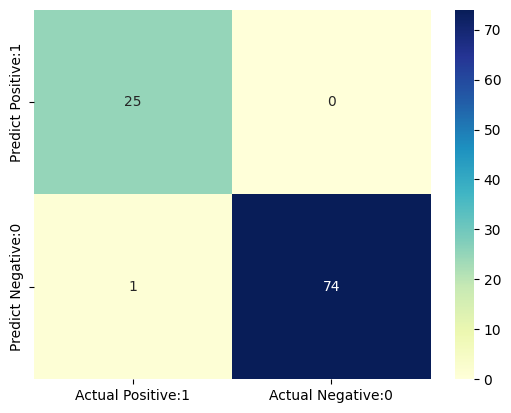

In [95]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix

test_errors = []
best_k = 0
min_error = 1.0

k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred)
    test_errors.append(error)
    if error < min_error:
        min_error = error
        best_k = k



knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(y_pred)
print("Accuracy : ", accuracy_score(y_test, y_pred))
print("Precision :", precision_score(y_test, y_pred))
print("Recall", recall_score(y_test, y_pred))
print("f1_score :", f1_score(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# 5. Find best K and minimum error
print(f"Best K: {best_k}")
print(f"Minimum Test Error: {min_error}")

cela represente les predictions du KNN sur les données d'entrainement

6. Plot the test errors

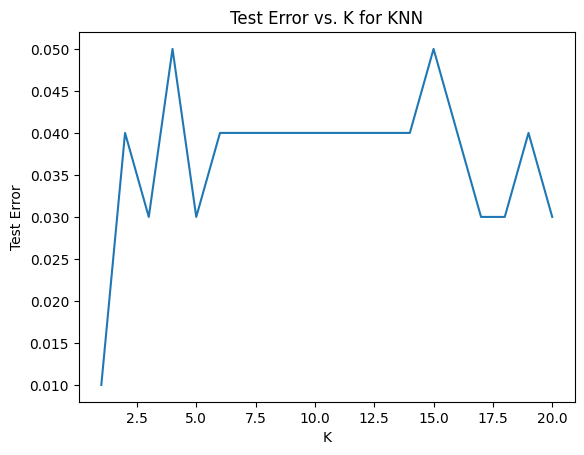

In [ ]:
plt.plot(k_values, test_errors)
plt.xlabel("K")
plt.ylabel("Test Error")
plt.title("Test Error vs. K for KNN")
plt.show()

Variation de l'erreur en fonction des valeurs de k( l'objectif est de trouver le k qui minimise l'erreur)

Verifions si il y'a surapprentissage

[1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1.
 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1.
 1. 0. 1. 1. 1. 0. 0. 1. 1. 1.]
Accuracy :  1.0
Precision : 1.0
Recall 1.0
f1_score : 1.0


<Axes: >

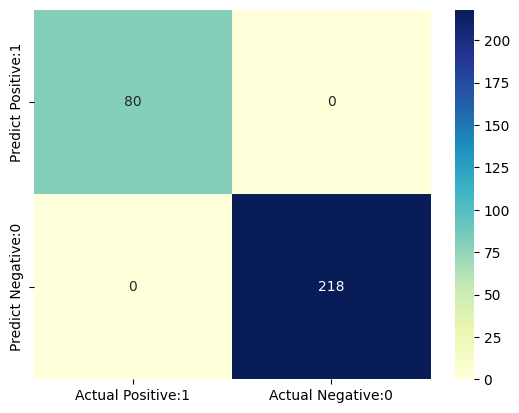

In [100]:
test_errors = []
best_k = 0
min_error = 1.0

k_values = range(1, 21) 

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    error = 1 - accuracy_score(y_train, y_pred)
    test_errors.append(error)
    if error < min_error:
        min_error = error
        best_k = k


knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
print(y_pred)
print("Accuracy : ", accuracy_score(y_train, y_pred))
print("Precision :", precision_score(y_train, y_pred))
print("Recall", recall_score(y_train, y_pred))
print("f1_score :", f1_score(y_train, y_pred))


cm = confusion_matrix(y_train, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')



Variation de l'erreur en fonction des valeurs de k

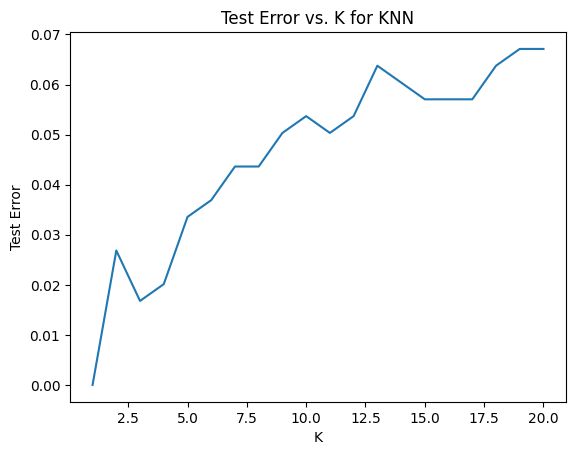

In [98]:
plt.plot(k_values, test_errors)
plt.xlabel("K")
plt.ylabel("Test Error")
plt.title("Test Error vs. K for KNN")
plt.show()

In [99]:
# 5. Find best K and minimum error
print(f"Best K: {best_k}")
print(f"Minimum Test Error: {min_error}")

Best K: 1
Minimum Test Error: 0.0


Le meilleur k pour ce ensemble de donnée est donc égale à 1

Et le taux d'erreur de test est de 2%

Cause de la taille du dataset si normale qu'on peut avoir une score parfaite